In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
import pandas as pd

In [ ]:
data = [("James","Smith","USA","CA"),("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),("Maria","Jones","USA","FL")
  ]
columns=["firstname","lastname","country","state"]
df=spark.createDataFrame(data=data,schema=columns)
#df.printSchema()
df.show()
#print(df.collect())

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+



In [ ]:
from pyspark.sql.functions import col,expr
data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",5)]
spark.createDataFrame(data).toDF("date","increment") \
    .select(col("date"),col("increment"), \
      expr("add_months(to_date(date,'yyyy-MM-dd'),cast(increment as int))").alias("inc_date")) \
    .show()

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        5|2020-02-20|
+----------+---------+----------+



In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import to_timestamp, current_timestamp
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

schema = StructType([
            StructField("seq", StringType(), True)])

# Modify the data to be a list of strings
dates = [['1']]  # Now a list containing a single-element list

df = spark.createDataFrame(dates, schema=schema)

df.show()

+---+
|seq|
+---+
|  1|
+---+



Is the graph bipartite? True
Greedy Maximum Matching: {(2, 'b'), (1, 'a'), (3, 'c')}


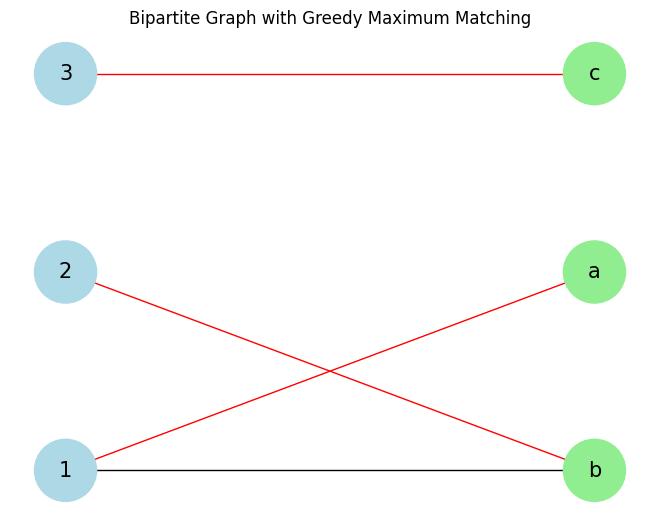

In [ ]:
#7


import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Create a bipartite graph
def create_bipartite_graph():
    B = nx.Graph()
    # Add nodes with the attribute "bipartite"
    top_nodes = {1, 2, 3}
    bottom_nodes = {'a', 'b', 'c'}
    B.add_nodes_from(top_nodes, bipartite=0)
    B.add_nodes_from(bottom_nodes, bipartite=1)

    # Add edges between nodes in the two sets
    edges = [(1, 'a'), (1, 'b'), (2, 'b'), (3, 'c')]
    B.add_edges_from(edges)

    return B, top_nodes, bottom_nodes

# Greedy algorithm for maximum matching
def greedy_maximum_matching(B, top_nodes, bottom_nodes):
    matching = set()  # To store the matching pairs
    matched_nodes = set()  # To keep track of matched nodes

    # Iterate over edges greedily
    for u, v in B.edges():
        if u not in matched_nodes and v not in matched_nodes:
            matching.add((u, v))
            matched_nodes.add(u)
            matched_nodes.add(v)

    return matching

# Step 1: Create a bipartite graph
B, top_nodes, bottom_nodes = create_bipartite_graph()

# Step 2: Check if the graph is bipartite
is_bipartite = bipartite.is_bipartite(B)
print(f"Is the graph bipartite? {is_bipartite}")

# Step 3: Perform greedy maximum matching if bipartite
if is_bipartite:
    # Apply the greedy maximum matching algorithm
    matching = greedy_maximum_matching(B, top_nodes, bottom_nodes)
    print(f"Greedy Maximum Matching: {matching}")

    # Step 4: Plot the graph with matching edges highlighted
    pos = nx.bipartite_layout(B, top_nodes)

    # Highlight matching edges in red
    matching_edges = list(matching)
    edge_colors = ['red' if (u, v) in matching_edges or (v, u) in matching_edges else 'black' for u, v in B.edges()]

    # Draw the graph with the highlighted matching
    nx.draw(B, pos, with_labels=True, edge_color=edge_colors, node_color=['lightblue' if n in top_nodes else 'lightgreen' for n in B.nodes()], node_size=2000, font_size=15)
    plt.title("Bipartite Graph with Greedy Maximum Matching")
    plt.show()
else:
    print("The graph is not bipartite.")